In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('air-passengers-test.csv')
df.Month = df.Month.aggregate(lambda x : x + '-01')
df

,Month,#Passengers
0,1958-09-01,404
1,1958-10-01,359
2,1958-11-01,310
3,1958-12-01,337
4,1959-01-01,360
5,1959-02-01,342
6,1959-03-01,406
7,1959-04-01,396
8,1959-05-01,420
9,1959-06-01,472


In [3]:
from azure import AzureEndpoint

url = 'http://bba9f75b-e423-4efc-bc06-5d70af8b33f6.southcentralus.azurecontainer.io/score'
endpoint = AzureEndpoint(url, df, '#Passengers')

data_in_dict = endpoint.get_input(0)
print('data_in_dict(#0):', data_in_dict)
print()

result = endpoint.predict(data_in_dict)
print('predict(#0):', result)
print()

result = endpoint.predict_all(debug=True)
print('predict_all:', result)
print()

data_in_dict(#0): {'Month': '1958-09-01'}

predict(#0): ({'forecast': [429.5615711140687], 'prediction_interval': ['[390.47749011474076, 468.6456521133967]'], 'index': [{'Month': -357696000000}]}, 429.5615711140687)

predict(#0): 429.5615711140687
predict(#1): 423.3771266696243
predict(#2): 419.9671266696243
predict(#3): 422.12490444740206
predict(#4): 421.94490444740205
predict(#5): 420.1549044474021
predict(#6): 424.8893488918465
predict(#7): 423.1382377807354
predict(#8): 424.36490444740207
predict(#9): 432.0115711140687
predict(#10): 438.56268222517986
predict(#11): 439.2804600029576
predict(#12): 429.5615711140687
predict(#13): 423.41157111406875
predict(#14): 420.21046000295763
predict(#15): 422.12490444740206
predict(#16): 422.43379333629093
predict(#17): 419.8693488918465
predict(#18): 424.2582377807354
predict(#19): 423.2293488918465
predict(#20): 424.4871266696243
predict(#21): 431.9493488918465
predict(#22): 438.76490444740205
predict(#23): 439.573793336291
predict(#24): 429

## 啟用「季節性與趨勢」
- 工作類型：預測
- 主要計量：R2 分數
- 解釋最佳模型：已停用
- 封鎖的演算法：TensorFlowDNN,TensorFlowLinearRegressor
- 交叉驗證數：5
- 深度學習：已停用
- 時間資料行：Month
- 預測範圍：12
- 預測目標延隔：[0]
- 目標移動視窗大小：0
- 季節性與趨勢：季節性與趨勢
- 國家或地區的假日：--
- 歷程資料的收集頻率：月
- 目標彙總函式：無
- 訓練時間 (小時)：6
- 計量分數閾值：--
- 驗證類型：K 折交叉驗證
- 並行反覆次數上限：6

In [4]:
model_in_dict = {
    'VotingEnsemble':                           'http://bba9f75b-e423-4efc-bc06-5d70af8b33f6.southcentralus.azurecontainer.io/score',
    'ExponentialSmoothing':                     'http://cf1aaff2-af2a-4542-aa7c-217ba7f99439.southcentralus.azurecontainer.io/score',
    'MinMaxScaler + ExtremeRandomTrees':        'http://43124187-db26-4d48-8605-25795d4d5445.southcentralus.azurecontainer.io/score',
    'StandardScalerWrapper + LightGBM':         'http://c7ebc47f-1034-4ede-9aa9-58f909fd75cb.southcentralus.azurecontainer.io/score',
    'StandardScalerWrapper + XGBoostRegressor': 'http://0e3ea939-b013-4e27-8cd5-87947055b33c.southcentralus.azurecontainer.io/score',
    'MinMaxScaler + RandomForest':              'http://8f895a0b-31b0-4029-bdd0-8262bed74447.southcentralus.azurecontainer.io/score',
    'SeasonalNaive':                            'http://e7eefda9-97e1-4d7e-8922-e31484953c9c.southcentralus.azurecontainer.io/score',
    'MaxAbsScaler + ElasticNet':                'http://ba90ffc6-2f6c-4670-bf1d-ef6bab177693.southcentralus.azurecontainer.io/score',
    'Prophet':                                  'http://de343cf8-e177-4784-bc7b-603b0ca2fd7c.southcentralus.azurecontainer.io/score',
    'AutoArima':                                'http://c4dbda09-5357-495a-a645-313a5ba60657.southcentralus.azurecontainer.io/score',
    'Naive':                                    'http://7e94db76-d65f-4b18-b4e8-f76576af60bd.southcentralus.azurecontainer.io/score',
    'Average':                                  'http://348c150d-08aa-4887-be16-f47f2c6cb4f7.southcentralus.azurecontainer.io/score',
}

df_model = pd.DataFrame(columns=['model', 'r2', 'rmse', 'y_pred'])

for name, url in model_in_dict.items():
    print('Model:', name)
    endpoint = AzureEndpoint(url, df, '#Passengers')
    results = endpoint.predict_all()
    
    y_pred = results[0]
    r2 = results[1]['r2']
    rmse = results[1]['rmse']
    
    for idx in range(len(y_pred)):
        y_pred[idx] = round(y_pred[idx], 2)
    
    df_model.loc[len(df_model)] = [name, r2, rmse, y_pred]
    display(df_model)
    print()

print('Final:')
display(df_model)

Model: VotingEnsemble


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."



Model: ExponentialSmoothing


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."



Model: MinMaxScaler + ExtremeRandomTrees


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."



Model: StandardScalerWrapper + LightGBM


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."



Model: StandardScalerWrapper + XGBoostRegressor


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."



Model: MinMaxScaler + RandomForest


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."



Model: SeasonalNaive


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."



Model: MaxAbsScaler + ElasticNet


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."
7,MaxAbsScaler + ElasticNet,0.739311,40.098084,"[410.22, 381.01, 357.53, 380.04, 390.62, 389.7..."



Model: Prophet


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."
7,MaxAbsScaler + ElasticNet,0.739311,40.098084,"[410.22, 381.01, 357.53, 380.04, 390.62, 389.7..."
8,Prophet,0.729141,40.872744,"[421.1, 391.61, 367.27, 391.43, 399.06, 400.35..."



Model: AutoArima


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."
7,MaxAbsScaler + ElasticNet,0.739311,40.098084,"[410.22, 381.01, 357.53, 380.04, 390.62, 389.7..."
8,Prophet,0.729141,40.872744,"[421.1, 391.61, 367.27, 391.43, 399.06, 400.35..."
9,AutoArima,-0.470124,95.222383,"[491.85, 491.85, 491.85, 491.85, 491.85, 491.8..."



Model: Naive


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."
7,MaxAbsScaler + ElasticNet,0.739311,40.098084,"[410.22, 381.01, 357.53, 380.04, 390.62, 389.7..."
8,Prophet,0.729141,40.872744,"[421.1, 391.61, 367.27, 391.43, 399.06, 400.35..."
9,AutoArima,-0.470124,95.222383,"[491.85, 491.85, 491.85, 491.85, 491.85, 491.8..."



Model: Average


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."
7,MaxAbsScaler + ElasticNet,0.739311,40.098084,"[410.22, 381.01, 357.53, 380.04, 390.62, 389.7..."
8,Prophet,0.729141,40.872744,"[421.1, 391.61, 367.27, 391.43, 399.06, 400.35..."
9,AutoArima,-0.470124,95.222383,"[491.85, 491.85, 491.85, 491.85, 491.85, 491.8..."



Final:


,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."
7,MaxAbsScaler + ElasticNet,0.739311,40.098084,"[410.22, 381.01, 357.53, 380.04, 390.62, 389.7..."
8,Prophet,0.729141,40.872744,"[421.1, 391.61, 367.27, 391.43, 399.06, 400.35..."
9,AutoArima,-0.470124,95.222383,"[491.85, 491.85, 491.85, 491.85, 491.85, 491.8..."


In [5]:
df_model

,model,r2,rmse,y_pred
0,VotingEnsemble,0.112995,73.964802,"[429.56, 423.38, 419.97, 422.12, 421.94, 420.1..."
1,ExponentialSmoothing,-0.001342,78.587489,"[440.88, 440.88, 440.88, 440.88, 440.88, 440.8..."
2,MinMaxScaler + ExtremeRandomTrees,0.268515,67.168396,"[412.79, 357.13, 326.44, 345.86, 344.24, 328.1..."
3,StandardScalerWrapper + LightGBM,0.492588,55.942569,"[432.91, 377.31, 343.66, 371.98, 368.57, 345.7..."
4,StandardScalerWrapper + XGBoostRegressor,0.560885,52.041696,"[439.43, 387.09, 353.02, 374.27, 377.03, 361.3..."
5,MinMaxScaler + RandomForest,0.279206,66.675725,"[409.76, 357.28, 321.32, 342.84, 344.84, 322.6..."
6,SeasonalNaive,-0.187428,85.578702,"[404.0, 404.0, 404.0, 404.0, 404.0, 404.0, 404..."
7,MaxAbsScaler + ElasticNet,0.739311,40.098084,"[410.22, 381.01, 357.53, 380.04, 390.62, 389.7..."
8,Prophet,0.729141,40.872744,"[421.1, 391.61, 367.27, 391.43, 399.06, 400.35..."
9,AutoArima,-0.470124,95.222383,"[491.85, 491.85, 491.85, 491.85, 491.85, 491.8..."


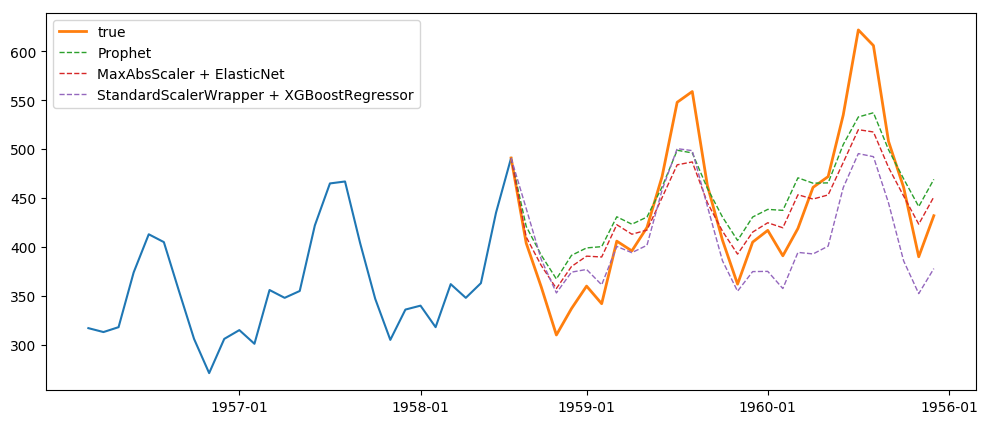

In [6]:
import pandas
import matplotlib.pyplot as plt

df_train = pd.read_csv('air-passengers-train.csv', index_col=[0])
df_test  = pd.read_csv('air-passengers-test.csv',  index_col=[0])

# zoom-in the tail section
zoom_in = True
if zoom_in:
    df_train = df_train[-30:-1]

plt.figure(figsize=(12, 5), dpi=100)


# x-axis
month = [df_train.index[-1]]
month.extend(df_test.index)


# plot true
plt.plot(df_train)

# plot true
y_true = df_test["#Passengers"]
passengers = [df_train["#Passengers"][-1]]
passengers.extend(y_true)
df_true = pandas.DataFrame({
    'passengers': passengers
}, index=month)
plt.plot(df_true, label='true', linewidth=2)

# plot all models
idx_list1 = range(len(df_model))
idx_list2 = [0,2,3,4,5,7,8] # except straight-line
idx_list3 = [8,7,4]
idx_list = idx_list3
for idx in idx_list:
    model = df_model[idx:idx+1]
    model_name = model['model'].values[0]
    #display(model)
    y_pred = [df_train["#Passengers"][-1]]
    y_pred.extend(model['y_pred'].values[0])
    df_pred = pandas.DataFrame({
        'y_pred': y_pred
    }, index=month)
    plt.plot(df_pred, label=model_name, linewidth='1.0', linestyle='dashed')

    

if zoom_in:
    plt.xticks([str(y)+'-01' for y in range(1956, 1961, 1)])
else:
    plt.xticks([str(y)+'-01' for y in range(1949, 1962, 1)])
plt.legend(loc='upper left')
plt.show()